In [10]:
import sys
import copy
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.descriptors import CoulombMatrixSpectrum
from classes.pca import PCA
from classes.kmeans import KMeans
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [18]:
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1,pos_flat.shape[1]//2,2)
atom_cols = [Atom_Collection([Atom(position=pos, size=20) for pos in poses]) for poses in positions][5:35]
coul_desc = CoulombMatrixSpectrum()
fit_data = [coul_desc.get_descriptor(atom_col=atom_col) for atom_col in atom_cols]
pca = PCA(2)
pca.fit(data=fit_data)

In [19]:
descriptors = []
for atom_col in atom_cols:
    for i in range(10):
        atom_col_copy = copy.deepcopy(atom_col)
        atom_col_copy.rattle_atoms(delta=0.05, rattle_steps=np.random.randint(0, 4))
        descriptor = coul_desc.get_descriptor(atom_col=atom_col_copy)
        descriptors.append(descriptor)

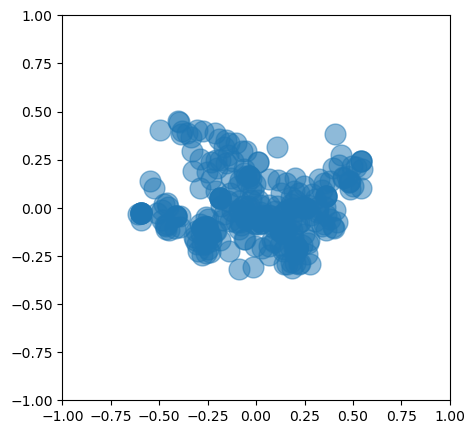

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
trans_data = pca.transform(data=descriptors)
ax.plot(trans_data[:,0], trans_data[:,1], 'o', markersize=15, alpha=0.5)
#ax.set_aspect("equal")

In [21]:
kmeans = KMeans(n_clusters=8, max_iter=100)
kmeans.fit(data=np.array(descriptors), init_mus=np.array([descriptors[i] for i in np.random.randint(0, len(descriptors), size=8)]))

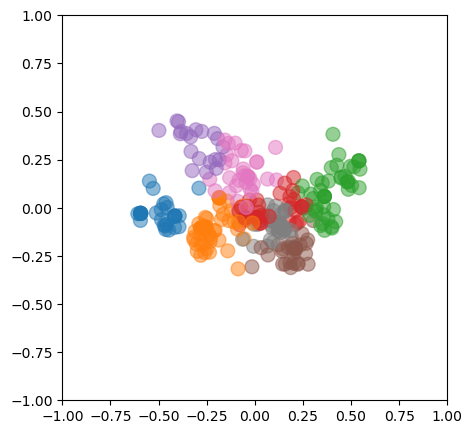

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
labels = kmeans.predict(descriptors)
ax.scatter(trans_data[:,0],trans_data[:,1],c=[f"C{label}" for label in labels], s=100, alpha=0.5)
trans_mus = pca.transform(data=kmeans.mus)
ax.set_aspect('equal')